In [1]:
"""Test pre-trained RGB model on a single video.

Date: 01/15/18
Authors: Bolei Zhou and Alex Andonian

This script accepts an mp4 video as the command line argument --video_file
and averages ResNet50 (trained on Moments) predictions on num_segment equally
spaced frames (extracted using ffmpeg).

Alternatively, one may instead provide the path to a directory containing
video frames saved as jpgs, which are sorted and forwarded through the model.

ResNet50 trained on Moments is used to predict the action for each frame,
and these class probabilities are average to produce a video-level predction.

Optionally, one can generate a new video --rendered_output from the frames
used to make the prediction with the predicted category in the top-left corner.

"""

import os
import argparse
import moviepy.editor as mpy

import torch.optim
import torch.nn.parallel
from torch.nn import functional as F

import models
from utils import extract_frames, load_frames, render_frames




In [2]:

# Load model
model = models.load_model('resnet50')

# Get dataset categories
categories = models.load_categories()
eat_idx = categories.index("eating")

In [3]:
video_file = "mrbean.mp4"

# Load the video frame transform
transform = models.load_transform()

frames = extract_frames(video_file, 30)


# [num_frames, 3, 224, 224]
input = torch.stack([transform(frame) for frame in frames])

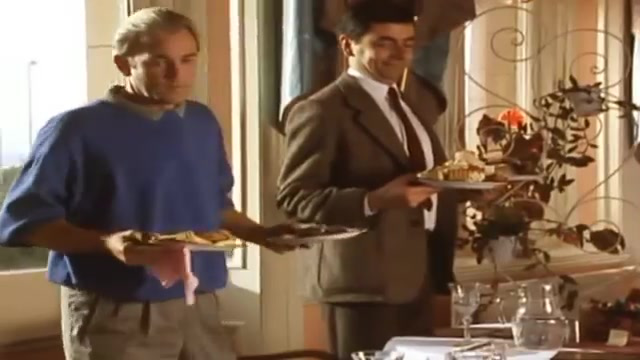

In [12]:
frames[2]

In [13]:
# Make video prediction
with torch.no_grad():
    logits = model(input)
    probs = F.softmax(logits, 1)
    #probs, idx = h_x.sort(0, True)
    #display(logits)


Frame #0 has probability #0.00014773840666748583
Frame #1 has probability #0.15045294165611267
Frame #2 has probability #0.007705788593739271
Frame #3 has probability #0.02660360187292099
Frame #4 has probability #0.0183680709451437
Frame #5 has probability #0.1260288655757904
Frame #6 has probability #0.022443057969212532
Frame #7 has probability #0.006810701452195644
Frame #8 has probability #0.04364941269159317
Frame #9 has probability #0.2163570076227188
Frame #10 has probability #0.15824882686138153
Frame #11 has probability #0.230447456240654
Frame #12 has probability #0.004497806075960398
Frame #13 has probability #0.05647773668169975
Frame #14 has probability #0.036062754690647125
Frame #15 has probability #0.16571511328220367
Frame #16 has probability #0.010086355730891228
Frame #17 has probability #0.05972975492477417
Frame #18 has probability #0.07496966421604156
Frame #19 has probability #0.1160227432847023
Frame #20 has probability #0.004025219939649105
Frame #21 has proba

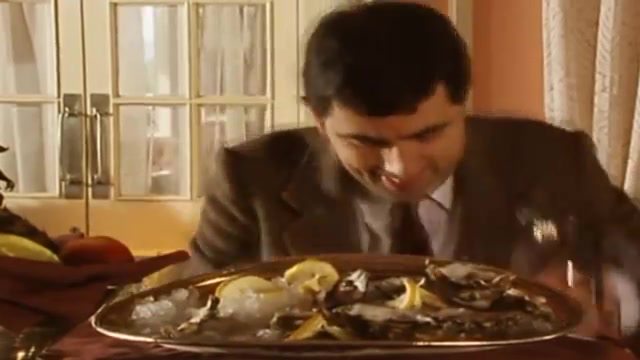

In [21]:
eat_probs = probs[:,eat_idx]
for frameno,probl in enumerate(eat_probs):
    print(f"Frame #{frameno} has probability #{probl}")

frames[29]

In [ ]:


# Make video prediction
with torch.no_grad():
    logits = model(input)
    h_x = F.softmax(logits, 1).mean(dim=0)
    probs, idx = h_x.sort(0, True)

# Output the prediction.
video_name = args.frame_folder if args.frame_folder is not None else args.video_file
print('RESULT ON ' + video_name)
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], categories[idx[i]]))

# Render output frames with prediction text.
if args.rendered_output is not None:
    prediction = categories[idx[0]]
    rendered_frames = render_frames(frames, prediction)
    clip = mpy.ImageSequenceClip(rendered_frames, fps=4)
    clip.write_videofile(args.rendered_output)
